# CRPS analyses

In this notebook, we analyse the CRPS computed with the notebook CRPS_computation.ipynb.

Some functions used here come from the homemade Python packages: libensdiv.py and libfig.py. So, make sure to install Python_library library and that Python is able to locate it: put **export PYTHONPATH=<path_to_Python_library\>:${PYTHONPATH}** in your .bashrc, .profile or equivalent.

In [1]:
#Importation of the different libraries

##Loading of NetCDF files
import xarray as xr

##Computing
import numpy as np
import libensdiv

##Graphical display
import libfig
import matplotlib.pyplot as plt

Name: libensdiv
Package: 
This is a collection of diverse functions for ensemble.
Name: libfig
Package: 
This is a collection of diverse functions for creating figures.


### Loading the data

In [2]:
#Definition of some useful variables to localise the data

path_store_commun="/lustre/fsstor/projects/rech/cli/commun/"
diri_results_ArcticBLISS="Arctic-BLISS_LF/"
diri_CRPS="CRPS/"

In [3]:
#Definition of experiments and periods of interest

period_interest=["19970116_19970125","19970126_19970204","19970205_19970214","19970215_19970224",\
                 "19970225_19970306","19970307_19970316","19970317_19970326","19970327_19970405"]
exp_interest=["EBLKBBM001","EBLKBBM010","EBLKBBM050","EBLKEVP001","EBLKEVP010","EBLKEVP050"]
nb_mber=20 #number of members
print(period_interest,exp_interest,nb_mber)

['19970116_19970125', '19970126_19970204', '19970205_19970214', '19970215_19970224', '19970225_19970306', '19970307_19970316', '19970317_19970326', '19970327_19970405'] ['EBLKBBM001', 'EBLKBBM010', 'EBLKBBM050', 'EBLKEVP001', 'EBLKEVP010', 'EBLKEVP050'] 20


In [5]:
#Loading the NetCDF files containing the CRPS

dat_crps=[[] for _ in range(len(period_interest))] #list that will contain the CRPS of the different experiments

for iperiod in range(len(period_interest)): #iteration over the periods of interest
    for iexp in range(len(exp_interest)): #iteration over the experiments of interest
        path_crps=path_store_commun+diri_results_ArcticBLISS+exp_interest[iexp]+"/"+period_interest[iperiod]+"/"+diri_CRPS+"CRPS_"+exp_interest[iexp]+"_"+period_interest[iperiod]+".nc"
        print(path_crps)
        dat_crps[iperiod].append(xr.open_mfdataset(path_crps,decode_times=True))

print(len(dat_crps))

/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKBBM001/19970116_19970125/CRPS/CRPS_EBLKBBM001_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKBBM010/19970116_19970125/CRPS/CRPS_EBLKBBM010_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKBBM050/19970116_19970125/CRPS/CRPS_EBLKBBM050_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKEVP001/19970116_19970125/CRPS/CRPS_EBLKEVP001_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKEVP010/19970116_19970125/CRPS/CRPS_EBLKEVP010_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKEVP050/19970116_19970125/CRPS/CRPS_EBLKEVP050_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKBBM001/19970126_19970204/CRPS/CRPS_EBLKBBM001_19970126_19970204.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKBBM010/19970126_19970204/CRPS/CRPS_EBLKBBM010_19970

In [6]:
#Saving some useful variables for the following

##Size of the time dimension
size_time=dat_crps[0][0].sizes["time"]
print("size time",size_time)
print("//")
##Time vector
time=[dat_crps[iperiod][0].time.values for iperiod in range(len(period_interest))]
print(len(time),len(time[0]))
print("//")
##Time vector (in days since the beginning)
tdays=(time[0]-time[0][0])/np.timedelta64(1,'D')
print(len(tdays),tdays[:25],tdays[-25:])

size time 240
//
8 240
//
240 [0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
 0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
 1.        ] [8.95833333 9.         9.04166667 9.08333333 9.125      9.16666667
 9.20833333 9.25       9.29166667 9.33333333 9.375      9.41666667
 9.45833333 9.5        9.54166667 9.58333333 9.625      9.66666667
 9.70833333 9.75       9.79166667 9.83333333 9.875      9.91666667
 9.95833333]


### Computing the mean wind speed over the domain

/lustre/fsn1/projects/rech/cli/regi915/NEMO//NANUK4/NANUK4_ICE_ABL-EBLKBBM010-S/00001801-00003000/001NANUK4_ICE_ABL-EBLKBBM010_1h_19970116_19970125_grid_T 1920 1920
1997-01-16T00:30:00.000000000 1997-04-05T23:30:00.000000000 1997-01-16T00:30:00.000000000 1997-04-05T23:30:00.000000000


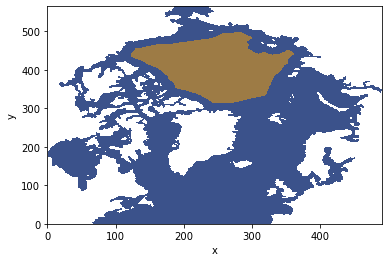

In [7]:
#Loading the needed files

##Masks of the configuration and horizontal mesh sizes
dat_masks=xr.open_dataset("/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4.L31-I/mesh_mask_NANUK4_L31_4.2_1stLev.nc")
##Masks of the domain of interest
dat_masks_domain=xr.open_dataset("/lustre/fswork/projects/rech/cli/udf71br/Laurines_work_Datlas/Masks/masks_domain_threshold_0.5.nc",decode_times=True)
##Loading an experiment (all periods) => contains the wind speed (same for all experiments)
dat_exp_BLK=xr.open_mfdataset("/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EBLKBBM010-S/*/001*1h*grid_T.nc4",decode_times=True)

print(dat_exp_BLK.name,dat_exp_BLK.sizes["time_counter"],size_time*len(period_interest))
print(dat_exp_BLK.time_counter[0].values,dat_exp_BLK.time_counter[-1].values,time[0][0],time[-1][-1])

#Visualisation of the configuration and domain masks at T-point

plt.contourf(dat_masks.tmask[0,0,:,:].where(dat_masks.tmask[0,0,:,:]>0))
plt.contourf(dat_masks_domain.tmask.where(dat_masks_domain.tmask>0),alpha=0.5,colors="orange")
plt.xlabel("x") ; plt.ylabel("y")
plt.show()

In [8]:
#Computing the mean wind speed over the domain

##Some preliminary variables
e1=dat_masks.e1t[0,:,:] ; e2=dat_masks.e2t[0,:,:] #horizontal mesh sizes
mask=dat_masks_domain.tmask #wind speed at T-point
data=dat_exp_BLK["windsp"] #only the wind speed interests us here

##Computation
mean_wind=libensdiv.fspatialmean(data,mask,e1,e2)
print(np.shape(mean_wind))

dat_exp_BLK.close()

(1920,)


### Time series of the CRPS

['EBLKBBM001', 'EBLKBBM010', 'EBLKBBM050', 'EBLKEVP001', 'EBLKEVP010', 'EBLKEVP050']
[[0, 1, 2], [3, 4, 5]] ['001', '010', '050']
[[0, 1, 2], [3, 4, 5]] ['001', '010', '050']


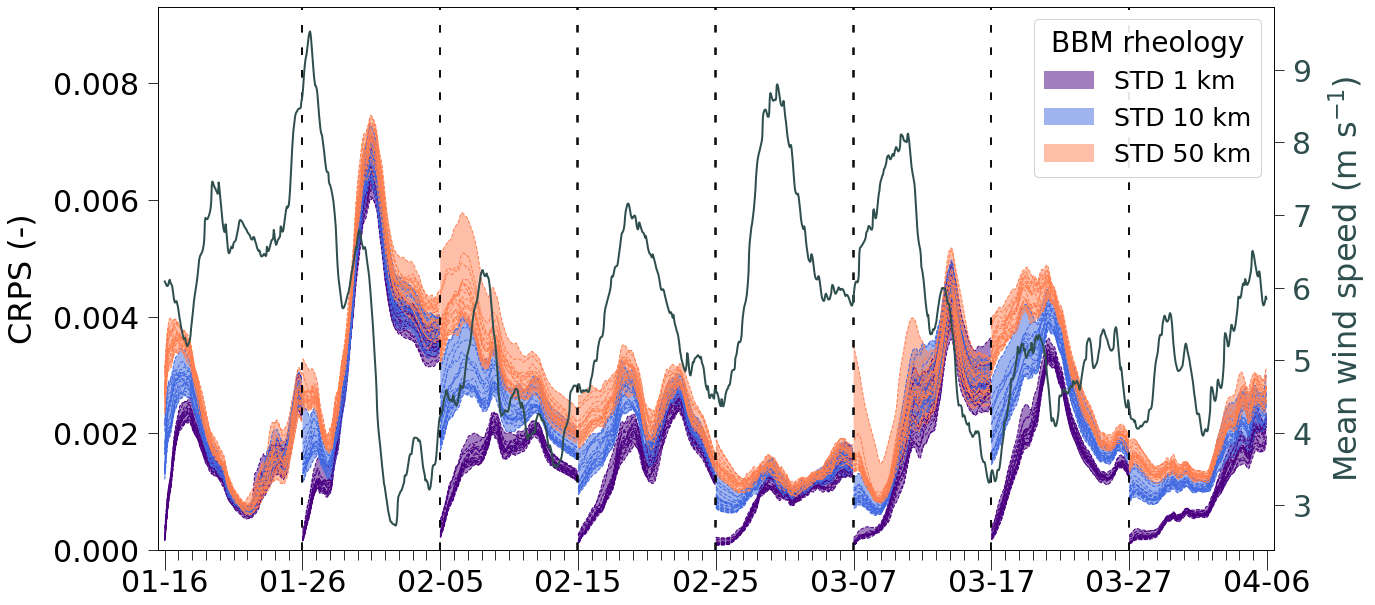

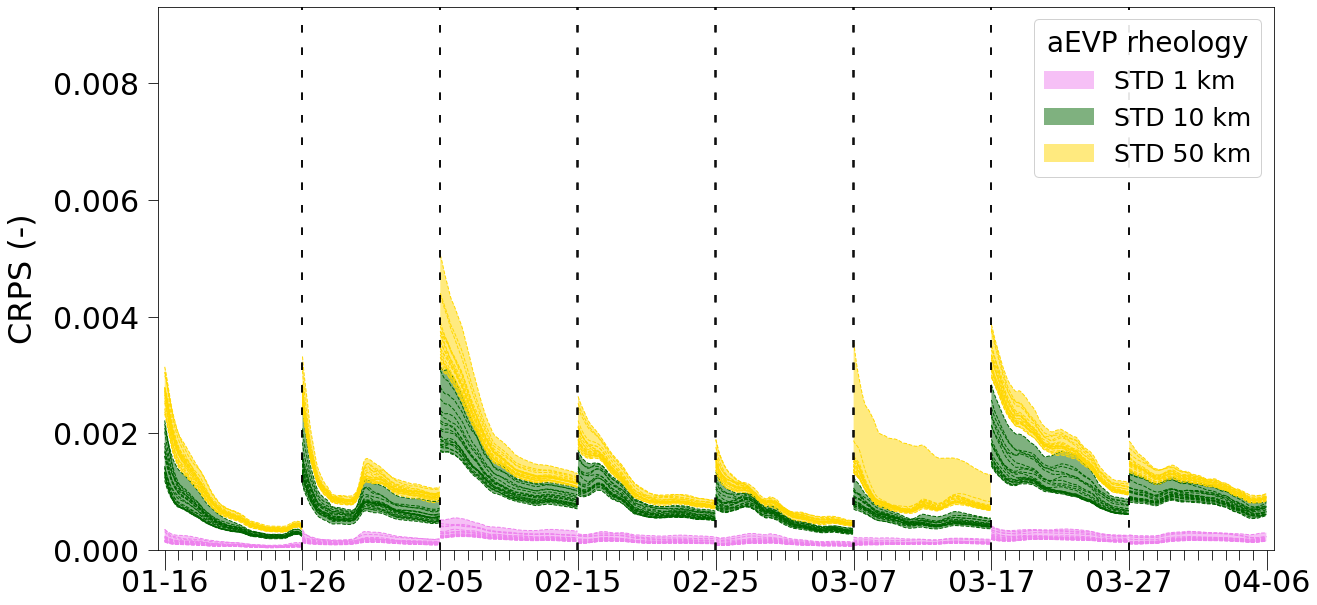

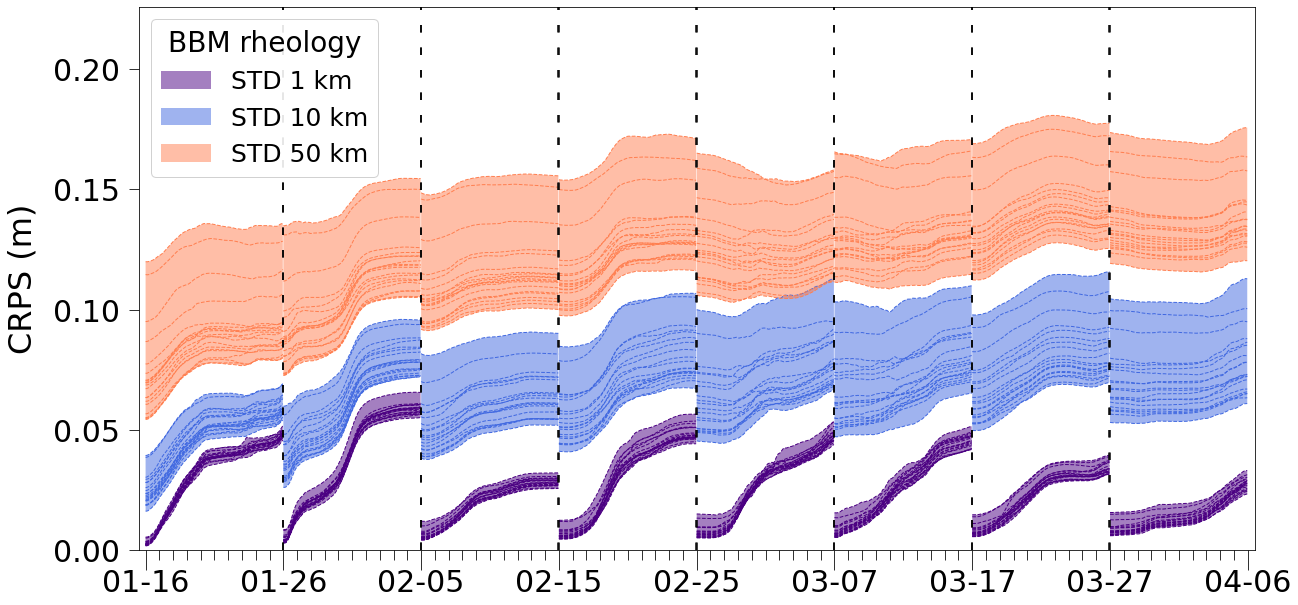

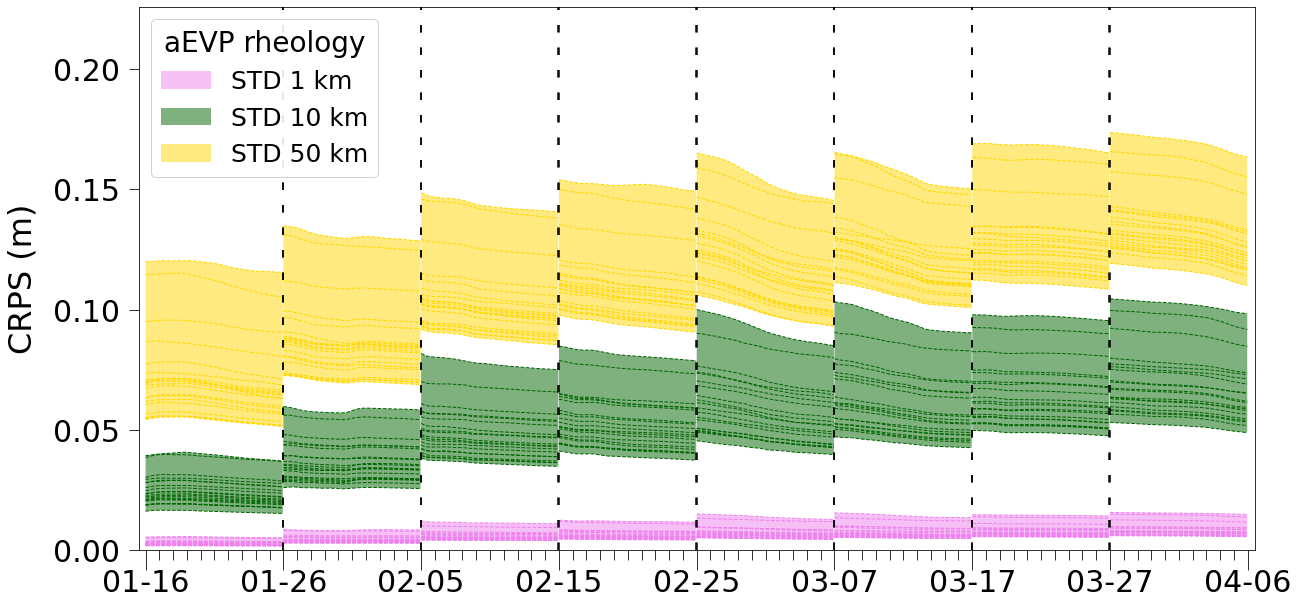

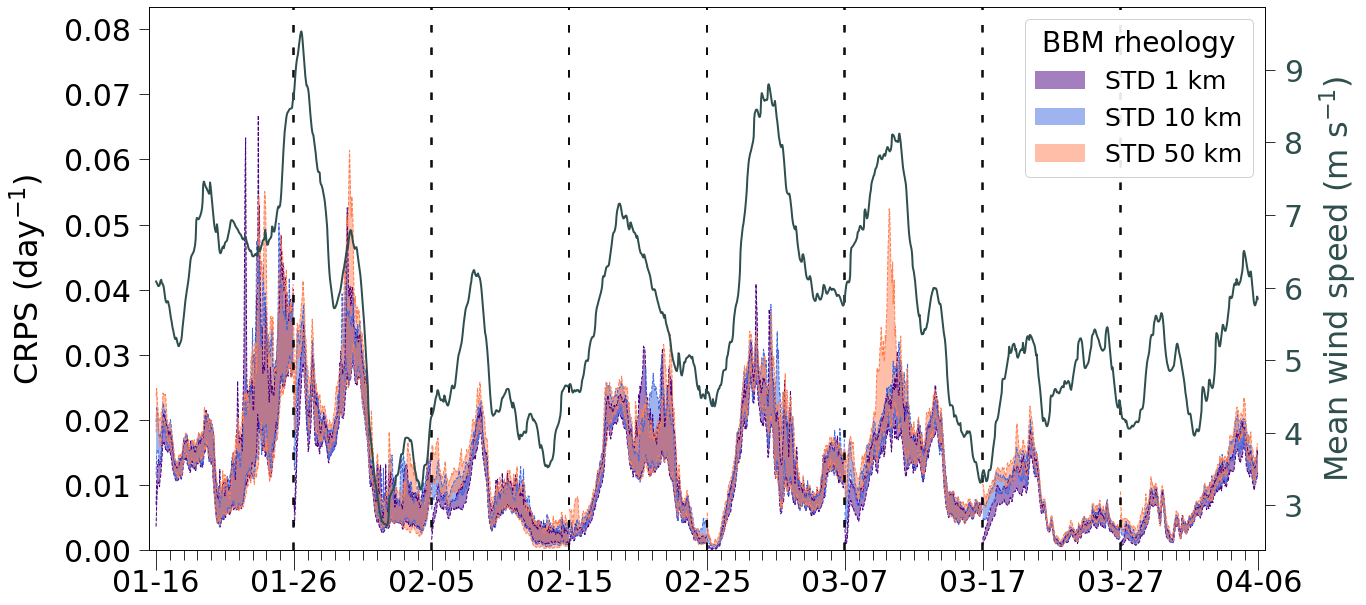

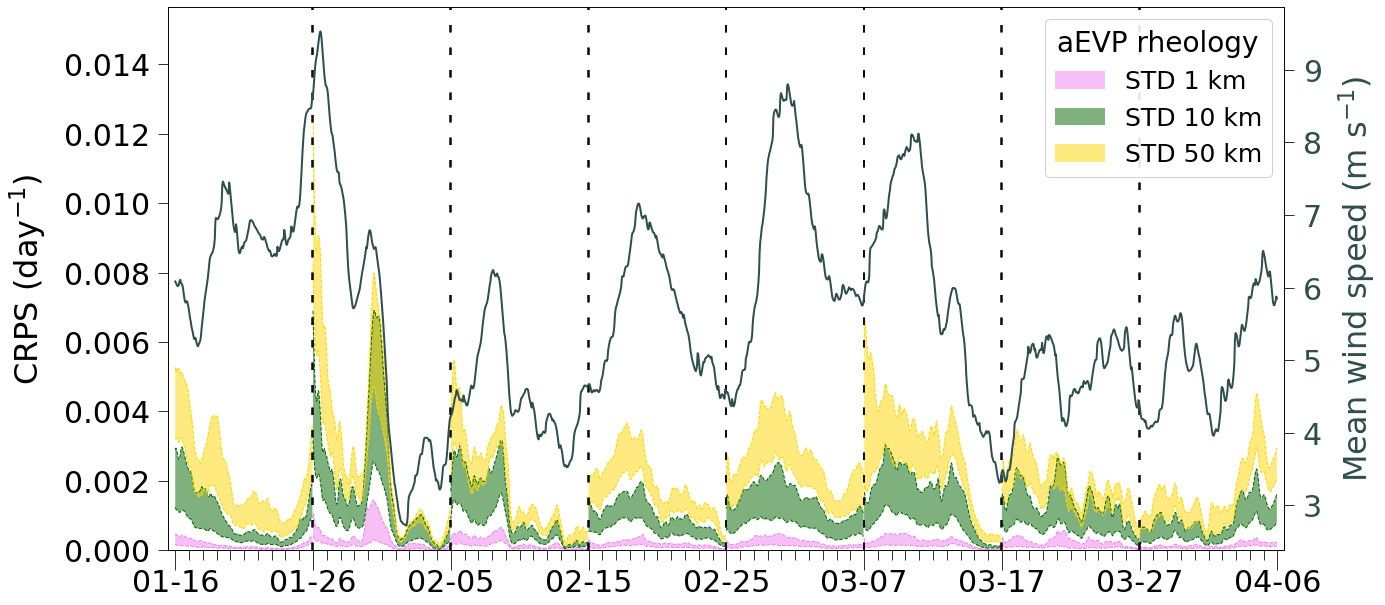

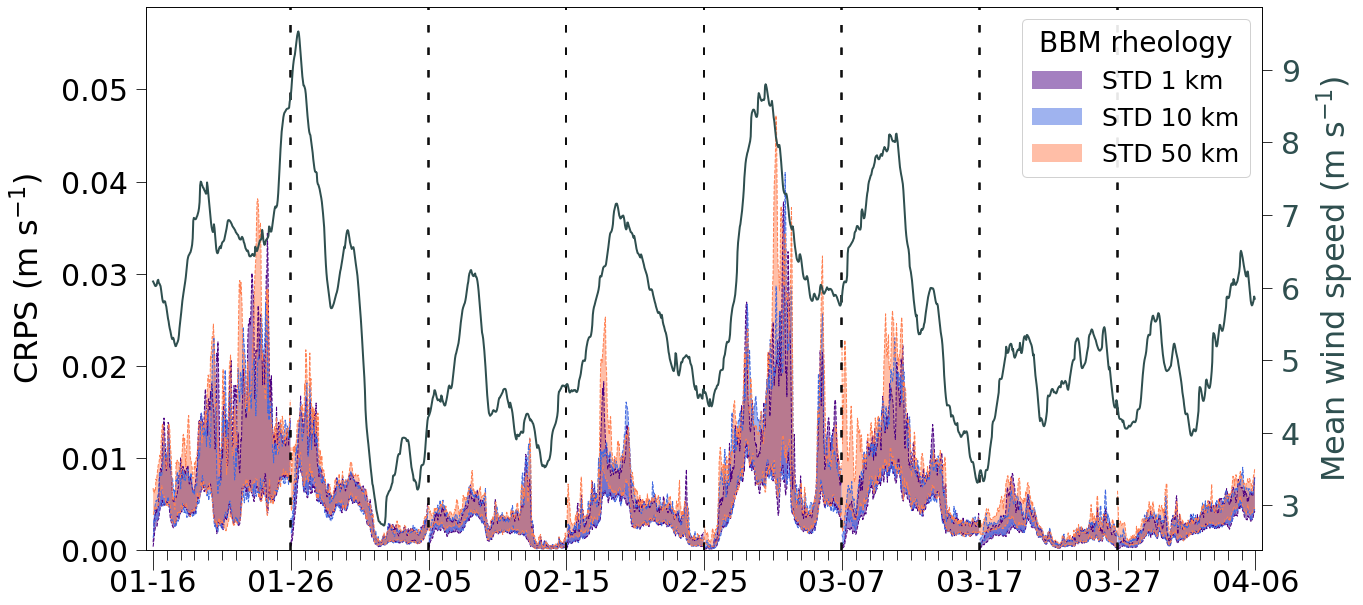

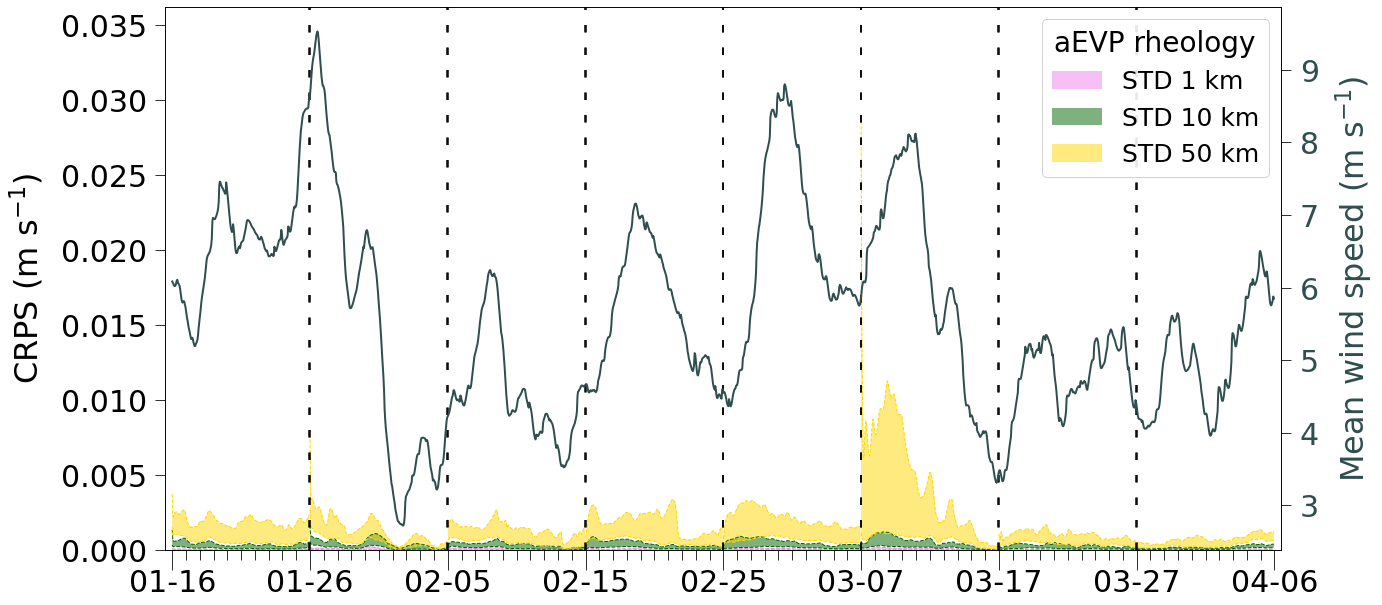

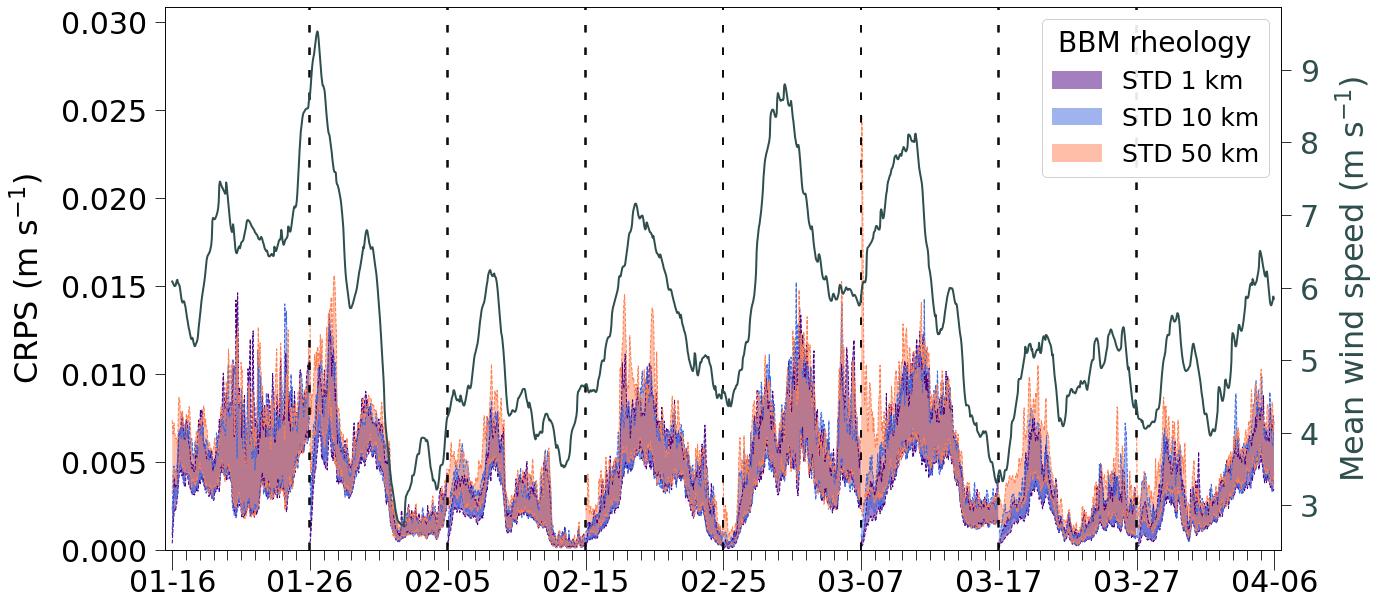

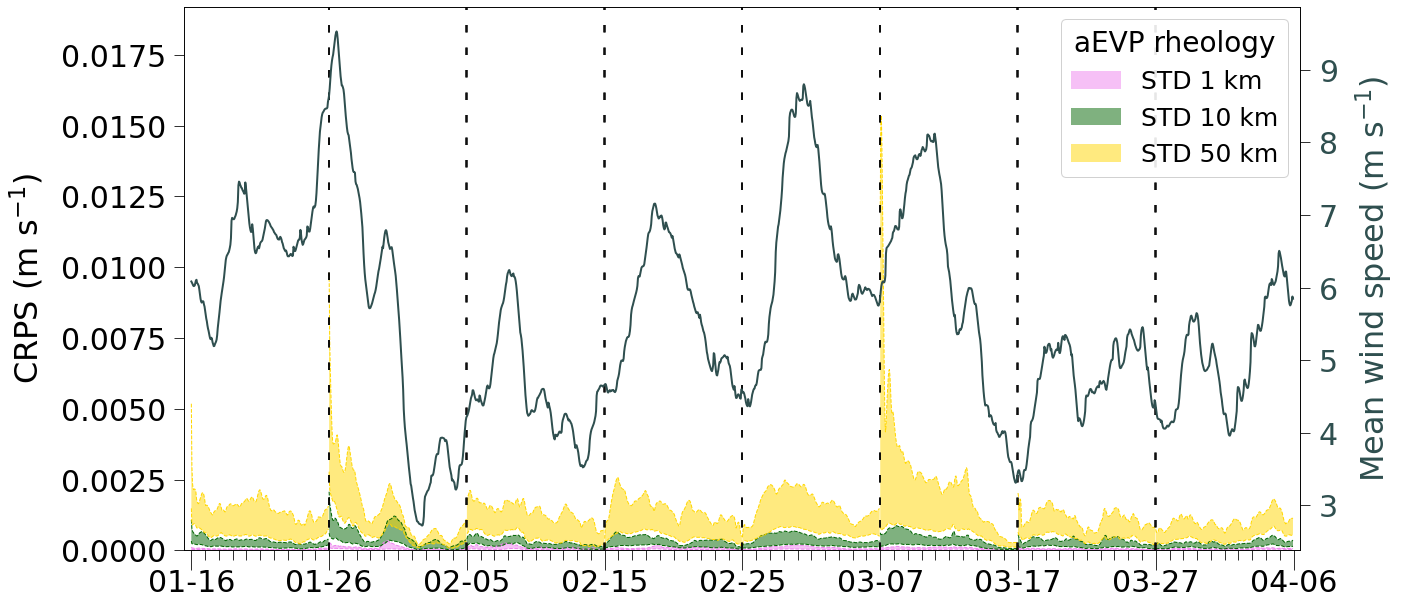

In [9]:
#Time series of the CRPS: all periods one after another
##a figure per rheology, all initial amplitudes of perturbation on the same figure

##Choose the kind of figure we want
possible_std=["001","010","050"]
possible_rheo=["BBM","EVP"]
type_atmos="BLK"

    ##Select the experiments for the figures
exp_fig=[[] for _ in range(len(possible_rheo))]
for iexp in range(len(exp_interest)):
    if type_atmos+possible_rheo[0] in exp_interest[iexp]:
        exp_fig[0].append(iexp)
    elif type_atmos+possible_rheo[1] in exp_interest[iexp]:
        exp_fig[1].append(iexp)

print(exp_interest)
print(exp_fig,possible_std)
    ##Removing the empty sublists, if any
exp_fig=[exp_tuple for exp_tuple in exp_fig if exp_tuple]
print(exp_fig,possible_std)

##Definition of the variables of interest
var_interest=[["siconc","T","-","sea ice concentration"],\
              ["sithic","T","m","sea ice thickness"],\
              ["sidefo-t","T",r"$\mathrm{day^{-1}}$","sea ice deformation rate"],\
              ["u_ice-u","U",r"$\mathrm{m \ s^{-1}}$","X-component of sea ice velocity"],\
              ["v_ice-v","V",r"$\mathrm{m \ s^{-1}}$","Y-component of sea ice velocity"]]

##Choose the first instant of each period to plot
tdeb=0
for k in range(len(var_interest)): #iteration over the variables
    if var_interest[k][0]=="sidefo-t": #for the deformation, conversion from s-1 to day-1
        coef=24.*3600.
    else:
        coef=1.

    ##Computation of the upper limit of the figure, common for all figures of the same variables (except the dynamical variables)
    lim_max=1.25*coef*np.max(np.array([np.max(np.array([np.max(np.array([dat_crps[iperiod][iexp][var_interest[k][0]][tdeb:] for iexp in exp_fig[ifig]])) for iperiod in range(len(period_interest))])) for ifig in range(len(exp_fig))]))
        ##limit for aEVP rheology for dynamical variables
    lim_max_rheo2=1.25*coef*np.max(np.array([np.max(np.array([dat_crps[iperiod][iexp][var_interest[k][0]][tdeb:] for iexp in exp_fig[1]])) for iperiod in range(len(period_interest))]))
    
    for ifig in range(len(exp_fig)): #iteration over the figures

        ##Creation of the figure
        fig,ax=plt.subplots(1,1,figsize=(20,10))
        
        ##Label of the figure
        label_fig=type_atmos+"+"+possible_rheo[ifig]

        xticks_val=[] ; xticks_lab=[] #initialisation of the lists that will contain the ticks labels

        for iperiod in range(len(period_interest)): #iteration over the periods of interest

            ##Ticks labels for each period
            xticks_val.extend(time[iperiod][::24])
            xticks_lab.extend([str(time[iperiod][0])[5:10]]+["" for _ in range(9)]) 
            
            for iexp in exp_fig[ifig]: #iteration over the experiments of interest

                ##Color and label associated with the experiment
                color,label=libfig.fgraph_attributesv2(exp_interest[iexp],"rheo",type_label="full",focus_model="rheo")

                ##Set up the legend
                label=""+str.strip(label[-9:])*(iperiod==0)
                label_title="a"*(possible_rheo[ifig]=="EVP")+possible_rheo[ifig]+" rheology"

                ##Plot the CRPS
                    ##envelope
                ax.fill_between(time[iperiod][tdeb:],dat_crps[iperiod][iexp][var_interest[k][0]][tdeb:,:].min("member_ref")*coef,dat_crps[iperiod][iexp][var_interest[k][0]][tdeb:,:].max("member_ref")*coef,label=label,facecolor=color,alpha=0.5)
                if k<2: ##plot the contours of the envelopes
                    ax.plot(time[iperiod][tdeb:],dat_crps[iperiod][iexp][var_interest[k][0]][tdeb:,:]*coef,c=color,lw=1,ls="--",zorder=1)
                else: ##plot all the members
                    ax.plot(time[iperiod][tdeb:],dat_crps[iperiod][iexp][var_interest[k][0]][tdeb:,:].min("member_ref")*coef,c=color,lw=1,ls="--",zorder=1)
                    ax.plot(time[iperiod][tdeb:],dat_crps[iperiod][iexp][var_interest[k][0]][tdeb:,:].max("member_ref")*coef,c=color,lw=1,ls="--",zorder=1)

            ##Plot a delimitation between the periods
            if iperiod>0:
                ax.plot([time[iperiod][0],time[iperiod][0]],[0,lim_max],ls=(0, (5, 10)),c="black")
            if iperiod<len(period_interest)-1:
                ax.plot([time[iperiod][-1],time[iperiod][-1]],[0,lim_max],ls=(0, (5, 10)),c="black")

        ##Plot the mean wind speed for some figures
        if (k>1) or ((k==0) and (possible_rheo[ifig]=="BBM")):#choose the figures which display the mean wind speed
            axbis=ax.twinx() #create the second y-axis
            axbis.plot(mean_wind.time_counter,mean_wind,color="darkslategrey",lw=2) #plot the mean wind speed
            ##Set up the secondary axis
            axbis.tick_params(axis="both",labelsize=30,pad=15,labelcolor="darkslategrey")
            axbis.set_ylabel("Mean wind speed ("+r"$\mathrm{m \ s^{-1}}$"+")",fontsize=32,color="darkslategrey",labelpad=15)
            for i, tick in enumerate(axbis.yaxis.get_major_ticks()):
                tick.tick2line.set_markersize(10) #adapt the size of the ticks
            
        ##Display the legend
        ax.legend(fontsize=25,title=label_title,title_fontsize=28,framealpha=0.9) 
                
        ##Set up the axes
        ax.tick_params(axis="both",labelsize=30,pad=15)
        ax.set_ylabel("CRPS ("+var_interest[k][2]+")",fontsize=32,labelpad=15)
            ##Set up the ticks
        xticks_val+=[time[-1][-1]+np.timedelta64(1,'h')]#last tick
        xticks_lab+=[str(time[-1][-1]+np.timedelta64(1,'h'))[5:10]]#last tick
        
        ax.set_xticks(xticks_val)
        ax.set_xticklabels(xticks_lab)

        for i, tick in enumerate(ax.xaxis.get_major_ticks()):
            if i % 10 == 0:
                tick.tick1line.set_markersize(20)#adapt the size of the ticks
            else:
                tick.tick1line.set_markersize(10)#adapt the size of the ticks
        
        for i, tick in enumerate(ax.yaxis.get_major_ticks()):
            tick.tick1line.set_markersize(10)#adapt the size of the ticks

            ##Set up the limits of the axes
        if k>1 and (possible_rheo[ifig]=="EVP"):
            ax.set_ylim(0,lim_max_rheo2)
        else:
            ax.set_ylim(0,lim_max)
        ax.set_xlim(xticks_val[0]-12*np.timedelta64(1,'h'),xticks_val[-1]+12*np.timedelta64(1,'h'))

        plt.show()
        ##Saving the figure (change the path if needed)        
        #fig.savefig("/lustre/fsn1/projects/rech/cli/udf71br/figures_CRPS_newexp/CRPS_"+label_fig+"_"+var_interest[k][0]+".png",\
        #        facecolor="white",edgecolor="none",bbox_inches="tight")

['EBLKBBM001', 'EBLKBBM010', 'EBLKBBM050', 'EBLKEVP001', 'EBLKEVP010', 'EBLKEVP050']
[[0, 1, 2], [3, 4, 5]] ['001', '010', '050']
[[0, 1, 2], [3, 4, 5]] ['001', '010', '050']


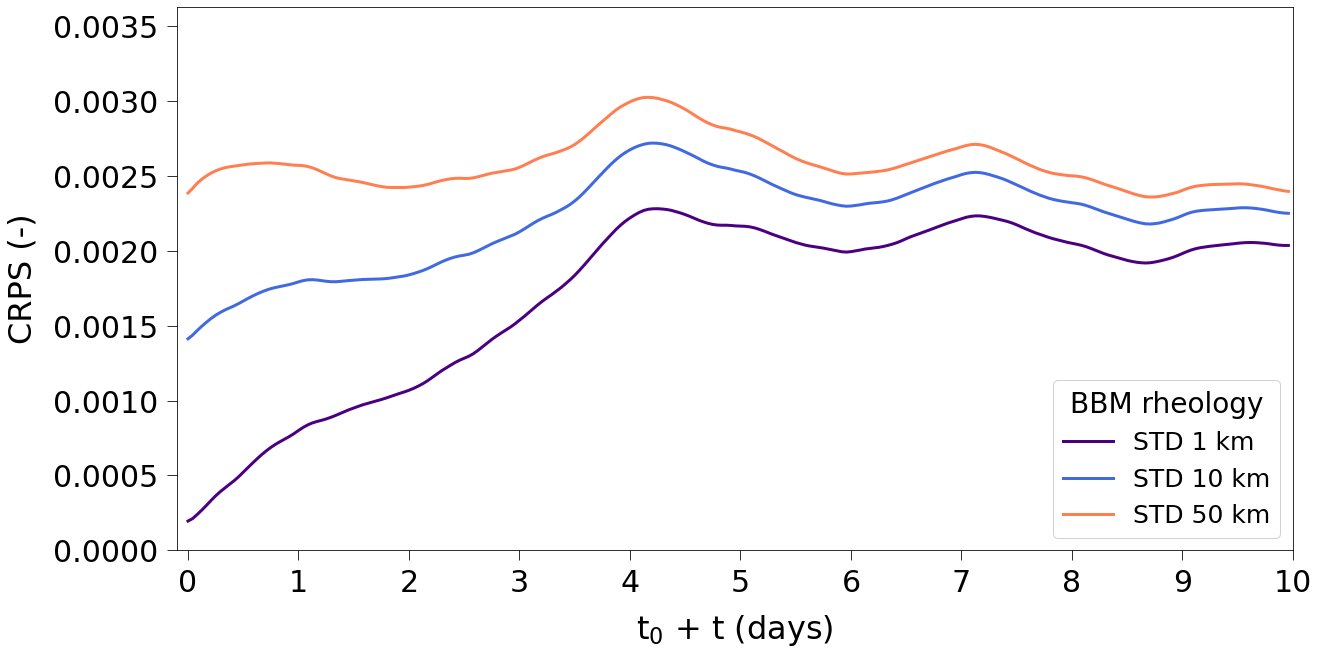

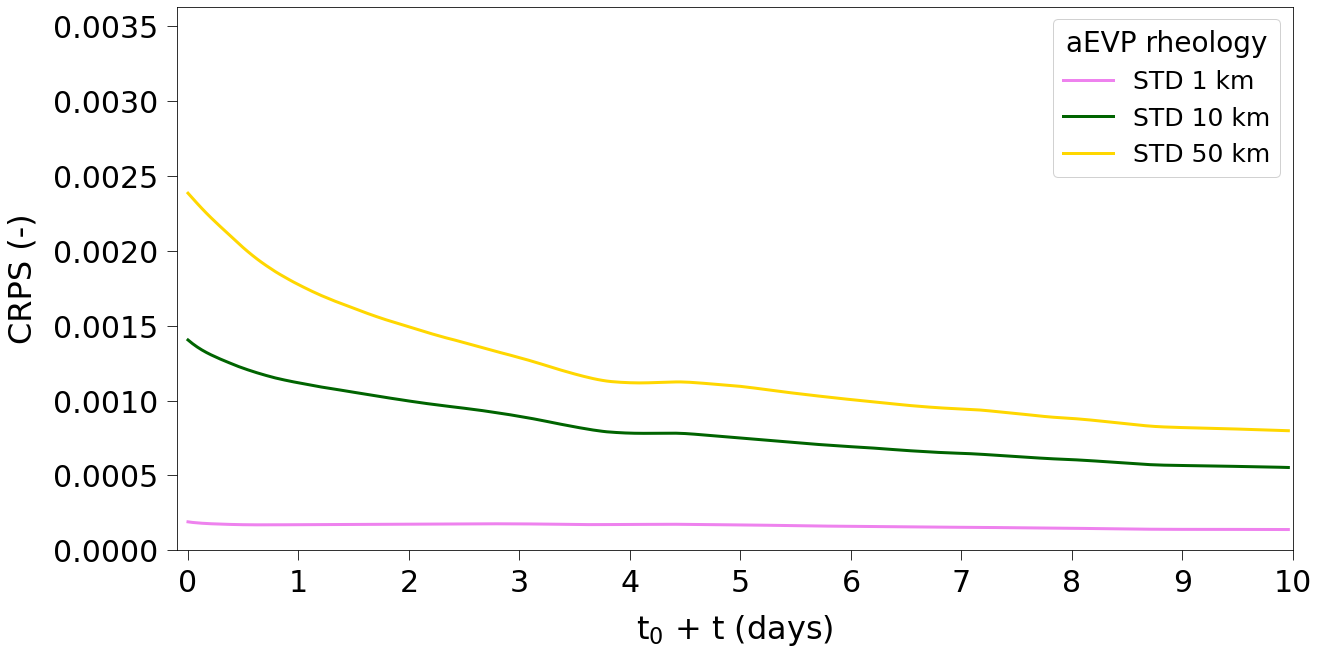

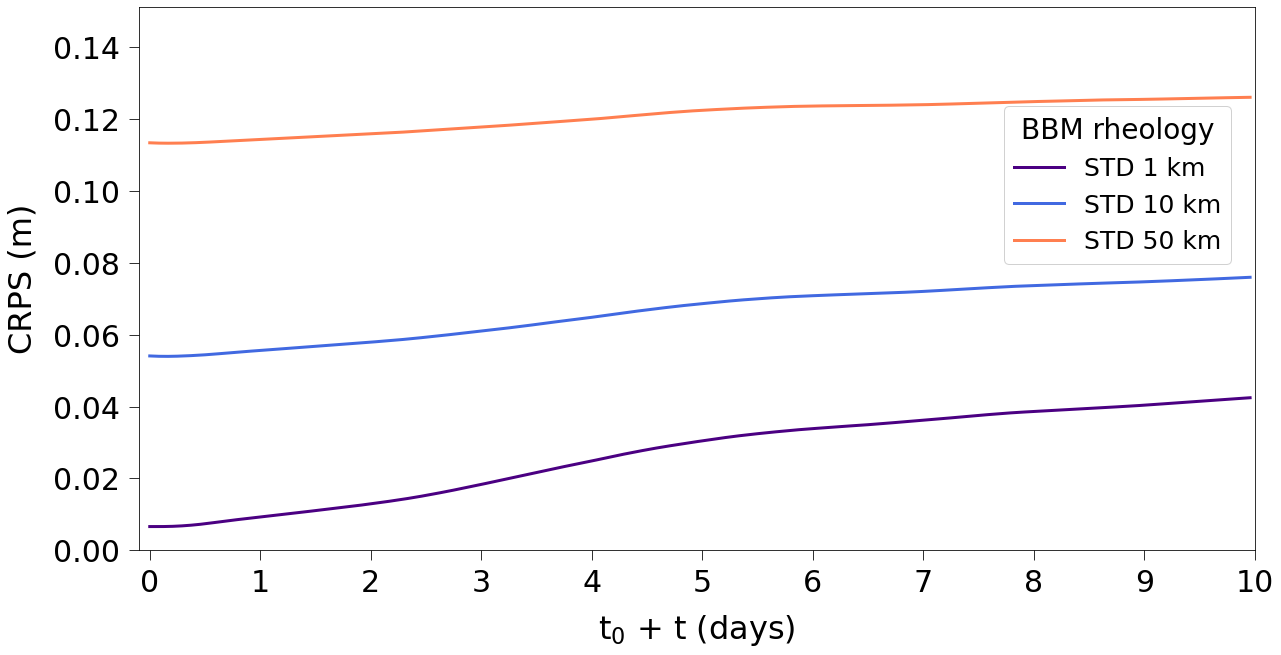

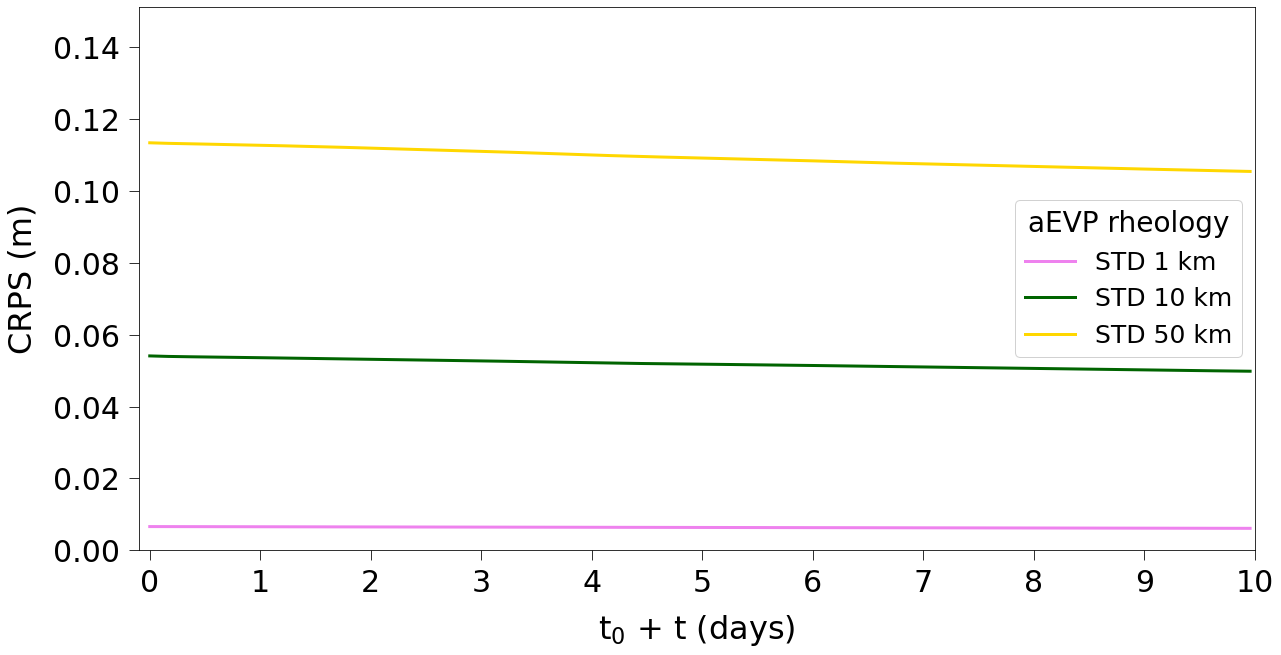

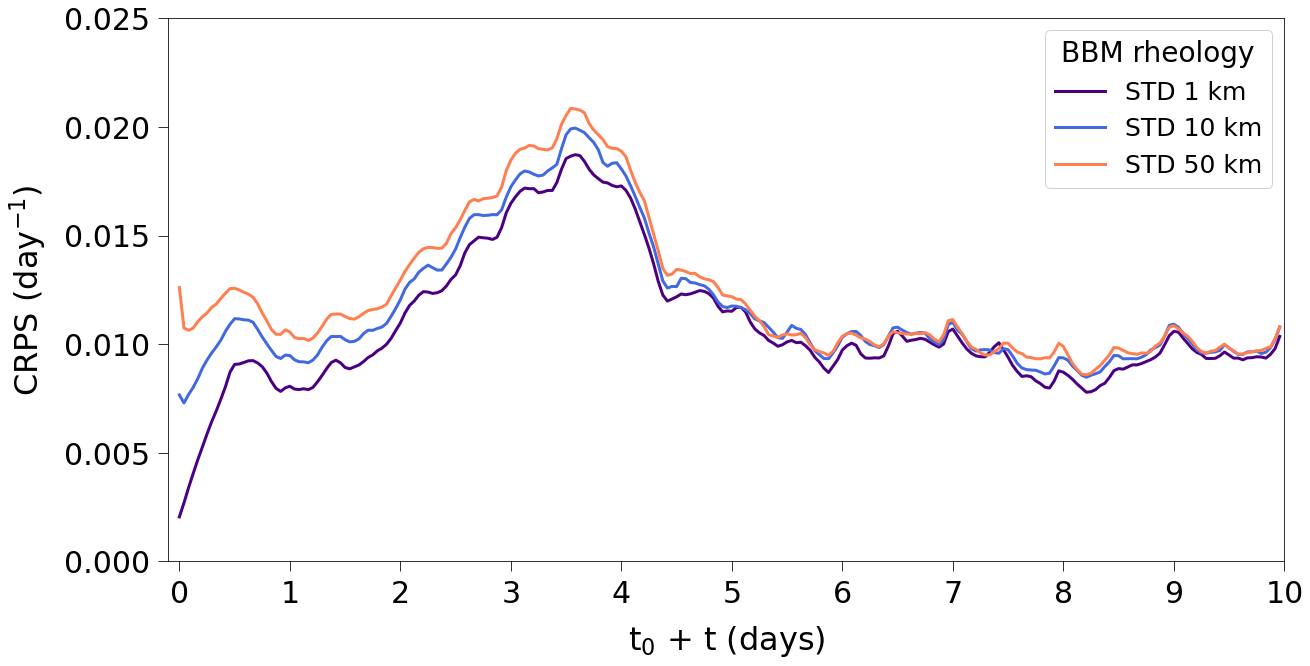

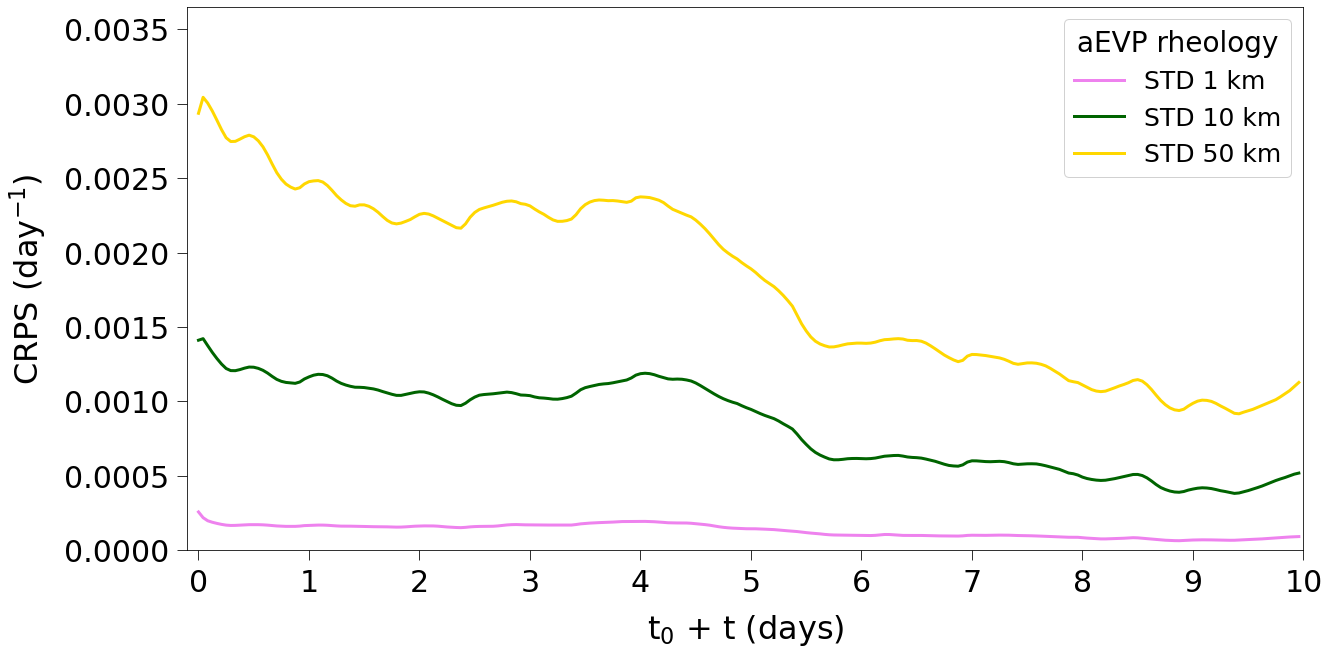

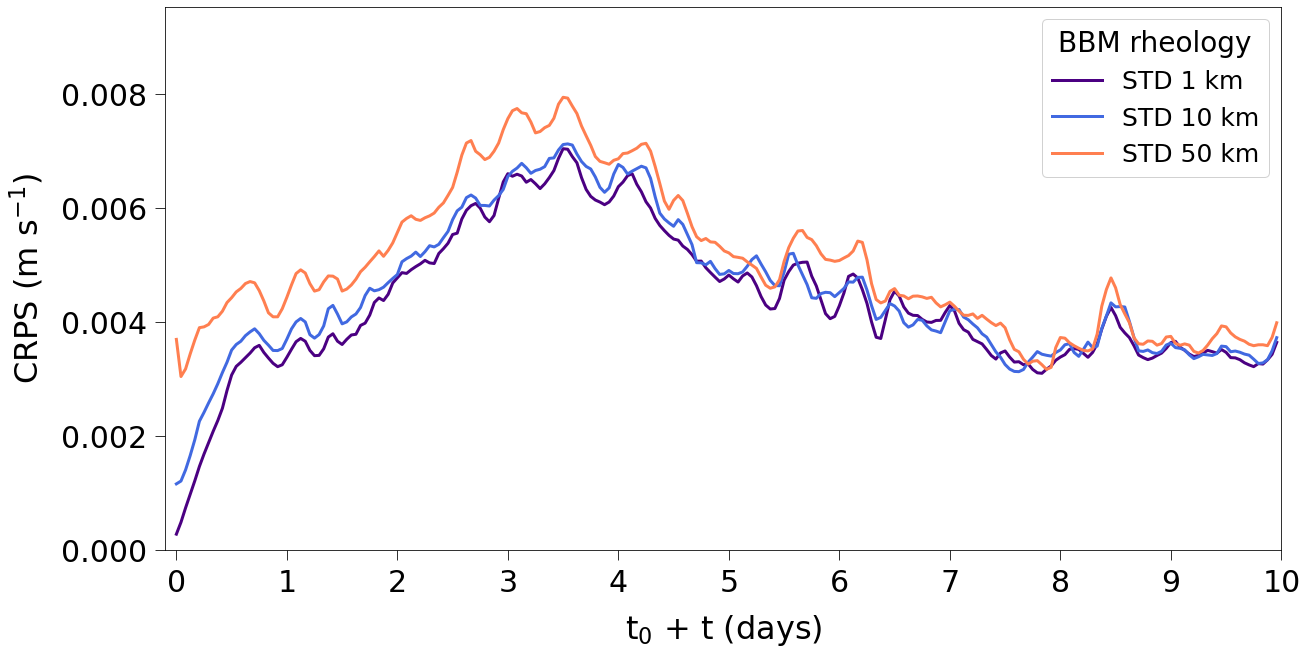

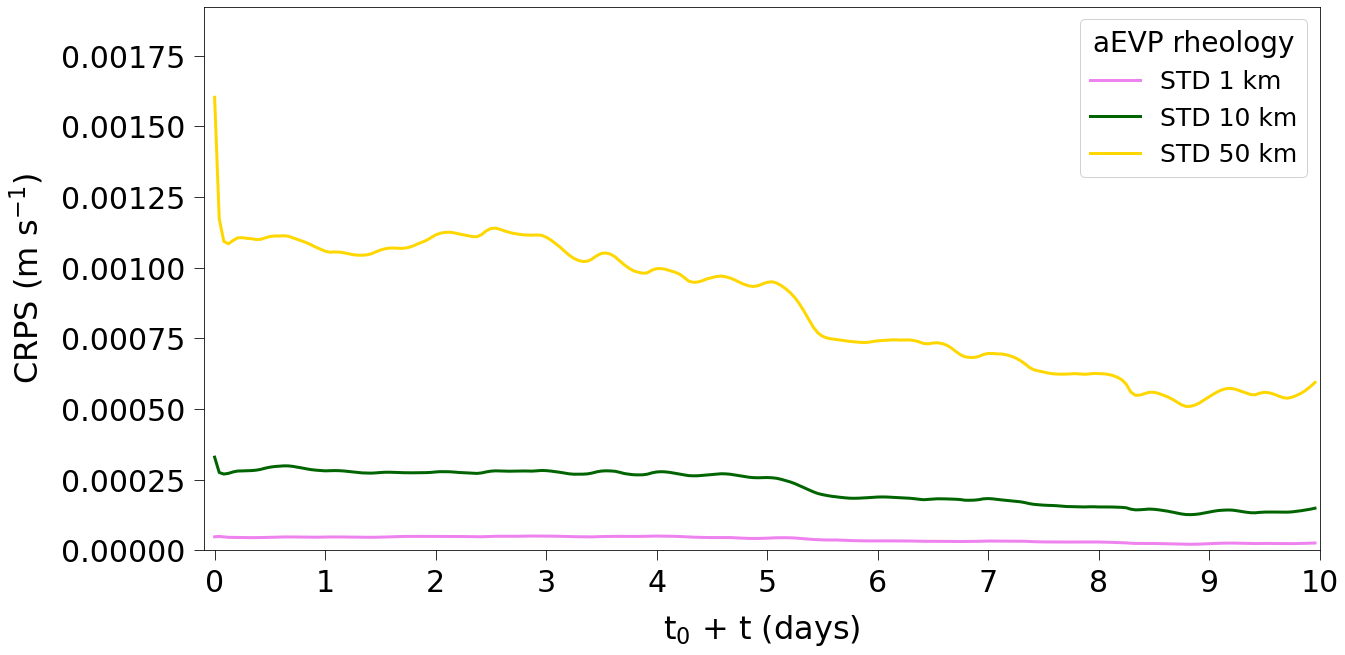

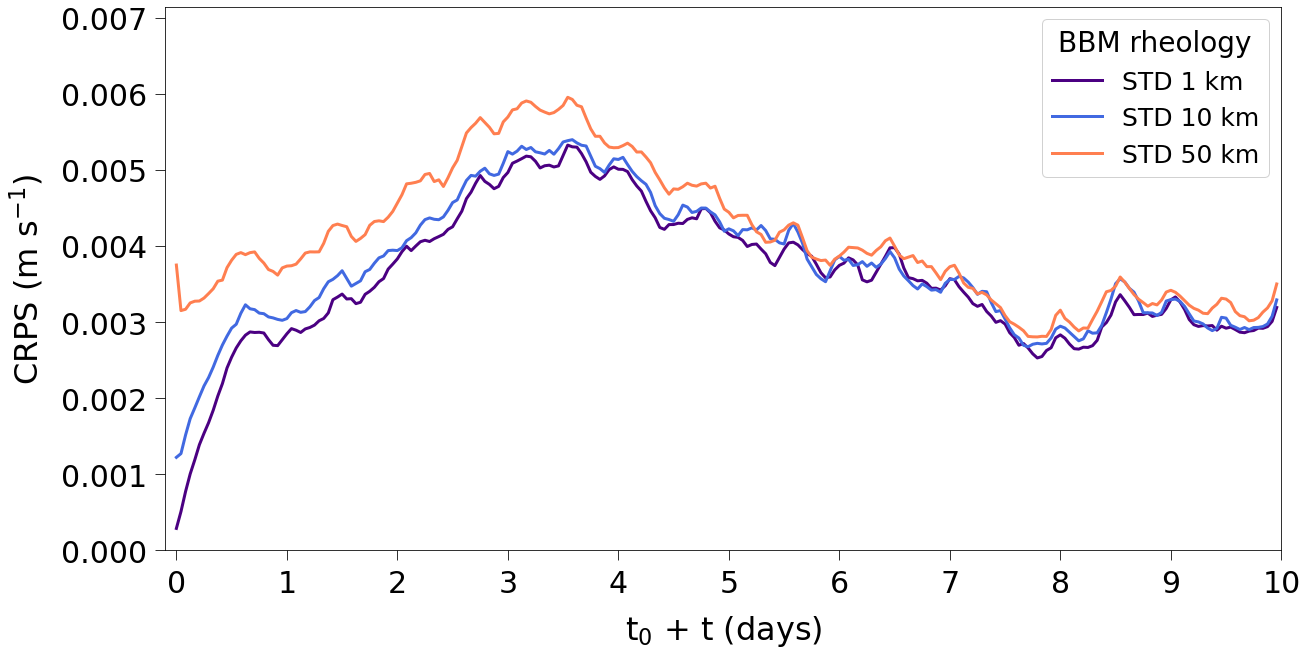

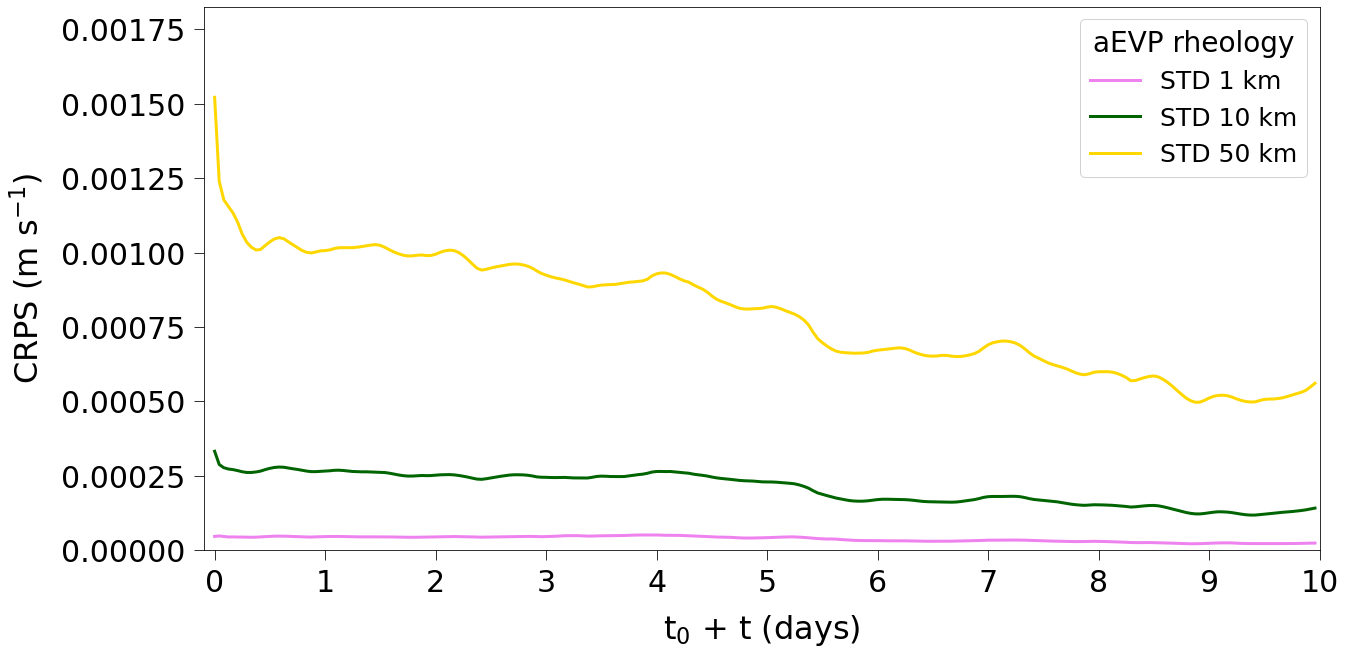

In [10]:
#Time series of the CRPS: mean over all periods and members
##a figure per rheology, all initial amplitudes of perturbation on the same figure

##Choose the kind of figure we want
possible_std=["001","010","050"]
possible_rheo=["BBM","EVP"]
type_atmos="BLK"

    ##Select the experiments for the figures
exp_fig=[[] for _ in range(len(possible_rheo))]
for iexp in range(len(exp_interest)):
    if type_atmos+possible_rheo[0] in exp_interest[iexp]:
        exp_fig[0].append(iexp)
    elif type_atmos+possible_rheo[1] in exp_interest[iexp]:
        exp_fig[1].append(iexp)

print(exp_interest)
print(exp_fig,possible_std)
    ##Removing the empty sublists, if any
exp_fig=[exp_tuple for exp_tuple in exp_fig if exp_tuple]
print(exp_fig,possible_std)

##Definition of the variables of interest
var_interest=[["siconc","T","-","sea ice concentration"],\
              ["sithic","T","m","sea ice thickness"],\
              ["sidefo-t","T",r"$\mathrm{day^{-1}}$","sea ice deformation rate"],\
              ["u_ice-u","U",r"$\mathrm{m \ s^{-1}}$","X-component of sea ice velocity"],\
              ["v_ice-v","V",r"$\mathrm{m \ s^{-1}}$","Y-component of sea ice velocity"]]

##Choose the first instant of each period to plot
tdeb=0

for k in range(len(var_interest)): #iteration over the variables
    if var_interest[k][0]=="sidefo-t": #for the deformation, conversion from s-1 to day-1
        coef=24.*3600.
    else:
        coef=1.

    ##Computation of the upper limit of the figure, common for all figures of the same variables (except the dynamical variables)
    lim_max=1.2*coef*np.max(np.array([np.max(np.array([(np.sum([dat_crps[iperiod][iexp][var_interest[k][0]][tdeb:,:].sum("member_ref") for iperiod in range(len(period_interest))],axis=0)/(len(dat_crps[iperiod][iexp].member_ref)*len(period_interest))) for iexp in exp_fig[ifig]])) for ifig in range(len(exp_fig))]))
        ##limit for aEVP rheology for dynamical variables
    lim_max_rheo2=1.2*coef*np.max(np.array([(np.sum([dat_crps[iperiod][iexp][var_interest[k][0]][tdeb:,:].sum("member_ref") for iperiod in range(len(period_interest))],axis=0)/(len(dat_crps[iperiod][iexp].member_ref)*len(period_interest))) for iexp in exp_fig[1]]))
    
    for ifig in range(len(exp_fig)): #iteration over the figures

        ##Creation of the figure
        fig,ax=plt.subplots(1,1,figsize=(20,10))
        
        ##Label of the figure
        label_fig=type_atmos+"+"+possible_rheo[ifig]
        
        for iexp in exp_fig[ifig]: #iteration over the experiments of interest

            ##Pre-computation: mean over all members and periods
            data_mean=np.sum([dat_crps[iperiod][iexp][var_interest[k][0]].sum("member_ref") for iperiod in range(len(period_interest))],axis=0)/(len(dat_crps[iperiod][iexp].member_ref)*len(period_interest))

            ##Color and label associated with the experiment
            color,label=libfig.fgraph_attributesv2(exp_interest[iexp],"rheo",type_label="full",focus_model="rheo")

            ##Set up the legend
            label=""+str.strip(label[-9:])
            label_title="a"*(possible_rheo[ifig]=="EVP")+possible_rheo[ifig]+" rheology"

            ##Plot the mean CRPS
            ax.plot(tdays[tdeb:],data_mean[tdeb:]*coef,c=color,lw=3,ls="-",zorder=1,label=label)
        
        ##Display the legend
        if (var_interest[k][0]=="sithic") and (possible_rheo[ifig]=="BBM"):#adjust the placement of the legend for the tickness
            ax.legend(fontsize=25,bbox_to_anchor=(0.99,0.84),title=label_title,title_fontsize=28,framealpha=0.9)
        else:
            ax.legend(fontsize=25,title=label_title,title_fontsize=28,framealpha=0.9) 
                
        ##Set up the axes
        ax.tick_params(axis="both",labelsize=30,pad=15)
        ax.set_xticks(np.append(tdays[::24],10))
        ax.set_xlabel(r"$\mathrm{t_0}$"+" + t (days)",fontsize=32,labelpad=15)
        ax.set_ylabel("CRPS ("+var_interest[k][2]+")",fontsize=32,labelpad=15)
        if k>1 and (possible_rheo[ifig]=="EVP"):
            ax.set_ylim(0,lim_max_rheo2)
        else:
            ax.set_ylim(0,lim_max)
        ax.set_xlim(-0.1,10)

            ##Set up the tick size
        for i, tick in enumerate(ax.yaxis.get_major_ticks()):
            tick.tick1line.set_markersize(10)#adapt the size of the ticks

        for i, tick in enumerate(ax.xaxis.get_major_ticks()):
            tick.tick1line.set_markersize(10)#adapt the size of the ticks

        plt.show()
        ##Saving the figure (change the path if needed)           
        #fig.savefig("/lustre/fsn1/projects/rech/cli/udf71br/figures_CRPS_newexp/CRPS_general_"+label_fig+"_"+var_interest[k][0]+".png",\
        #        facecolor="white",edgecolor="none",bbox_inches="tight")